# Evaluation Project - 5:Census Income Project

# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Imorting all the necessary libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the Data Set:

In [2]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Description of finalweight:
    The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    > single cell estimate of the population 16+ for each state.

    >Controls for Hispanic Origin by age and sex.

    >Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Overall view:

Here,the above dataset conatains all the details of the us population such as their age,workclass,finalwgt,education,marital status,occupation,relationship,race,SEX,capitalgain,capital loss,hrsper week,native country and income. The prediction task is to determine whether a person makes over $50K a year.

In [3]:
#To get the data dimension 
df.shape

(32560, 15)

In [4]:
#To get all the information regarding data set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df['Income'].value_counts() #To check the count of values in target variable('Income')

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

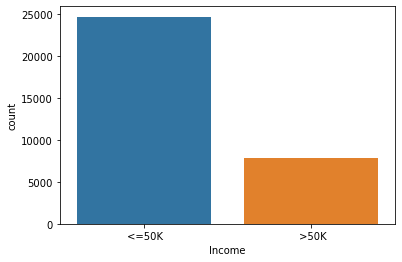

In [3]:
sns.countplot(x='Income',data=df)
plt.show()

# Since there is huge imbalance,we will try to resolve using imbalance overrfitting techniques.

In [8]:
df.isnull().sum() #checking the null value count of all the coulumns

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset

# Describing Data Set:

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Label Encoding:

In [5]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Income']=LE.fit_transform(df['Income'])
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

label Encoder is needeed to convert 'Income' target variable in to numeric values so that it is used to check correlaion of feautures and label


# OrdinalEncoder:

ordinal encoding is used to convert AlL the feature object data to numerical.

In [6]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=ord_enc.fit_transform(df[i].values.reshape(-1,1))


In [5]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


# Correlation:

# Correlation Using Heatmap:

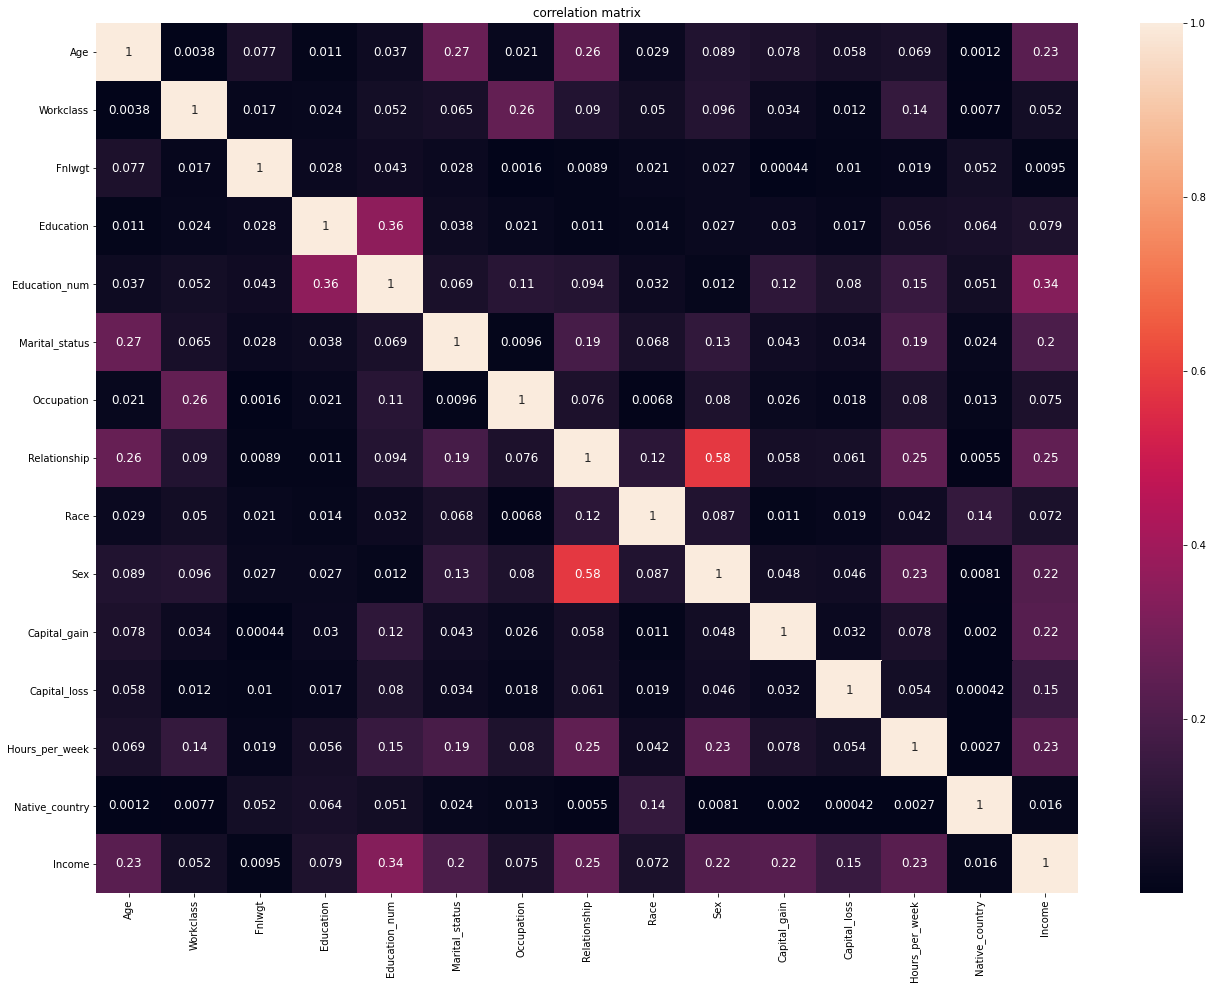

In [16]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()

In [17]:
corr=df.corr()
corr['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

Here, in the above series, how income is correlated with other features is shown.There, education num is decently correlated where as 
relationship column is weakly correlated.Now, let's find out skewness and outliers existance

# Checking outliers:

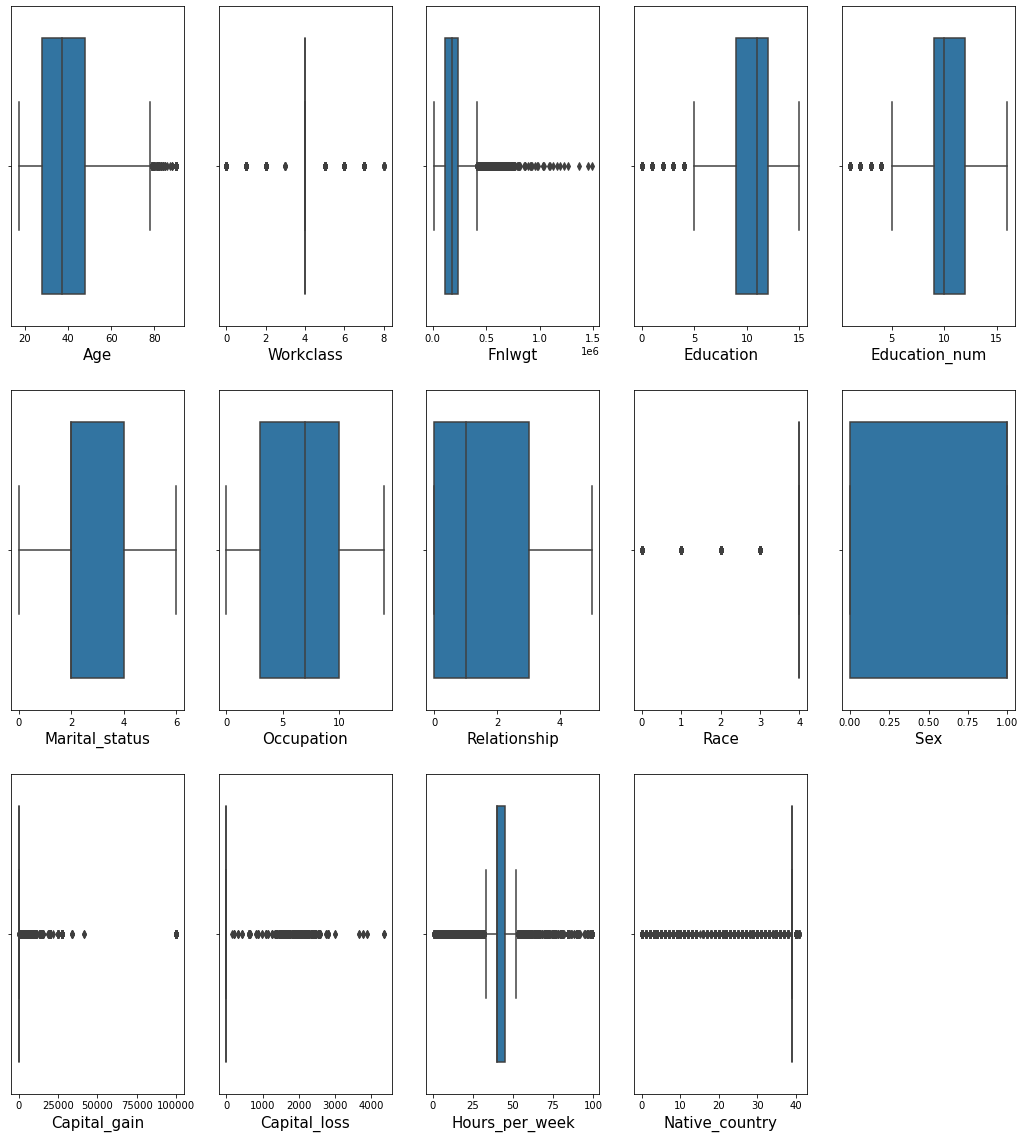

In [18]:
x=df.drop(columns=['Income'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=15:
        ax=plt.subplot(3,5,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

In the above graphs, We can find some outliers but cannot clearly state.

# Skewness:

In [6]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Skewness threshold is taken as +/-0.5.Columns which are having skewness which effects the model are:Fnlwgt,Capital_gain,Capital_loss.
    
Since all the other data are less effected or data in categorical form.

In [6]:
df=df.drop(columns=['Fnlwgt','Capital_gain','Capital_loss'],axis=1)

To remove skewness columns which effect the model drop columns are used.

In [22]:
df.shape # DIMENSION

(32560, 12)

# Removing Outliers using Z score Technique:

In [7]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df1=df[filtering_entry]

In [8]:
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


There are only 29227 rows and 12 columns afer removing the outliers

# Percentage data loss:

In [9]:
loss_percent=(32560-27417)/32560*100
loss_percent

15.795454545454547

Since,there huge loss of data according to the loss percentile we cannot use zscore technique to remove outliers.We are considering the original data.

In [10]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0


# Dividing the features and label columns as 'x' and 'y' and scaling the features:

In [11]:
x=df.drop(columns='Income')
y=df.Income

In [12]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)


# Finding the best Random State:

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [14]:
knn=KNeighborsClassifier()
maxacc=0
maxrs=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    pred_test=knn.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Best accuracy is: ',maxacc,'Best state is: ',maxrs)

Best accuracy is:  0.839527027027027 Best state is:  92


We have found that best random state is '122'. We will create our train-test split using this random state.

# Creating train-test split:

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=92)

# Balancing the data set:

In [17]:
import six
import sys
sys.modules['sklearn.external.six']=six
from imblearn.over_sampling import SMOTE

sm=SMOTE()
over_samp=SMOTE(0.80)
x_train_ns,y_train_ns=over_samp.fit_sample(x_train,y_train)

In [18]:
from collections import Counter # to get the count 
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 19788, 1: 6260})
Counter({0: 19788, 1: 15830})


# KNeighborsClassifier:

In [19]:
from sklearn.metrics import classification_report
knn.fit(x_train_ns,y_train_ns)
pred_test=knn.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8034398034398035
confusion_matrix: 
 [[4007  924]
 [ 356 1225]]
classification report:                precision    recall  f1-score   support

           0       0.92      0.81      0.86      4931
           1       0.57      0.77      0.66      1581

    accuracy                           0.80      6512
   macro avg       0.74      0.79      0.76      6512
weighted avg       0.83      0.80      0.81      6512



# DecisionTreeClassifier:

In [20]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train_ns,y_train_ns)
pred_test=clf1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8114250614250614
confusion_matrix: 
 [[4253  678]
 [ 550 1031]]
classification report:                precision    recall  f1-score   support

           0       0.89      0.86      0.87      4931
           1       0.60      0.65      0.63      1581

    accuracy                           0.81      6512
   macro avg       0.74      0.76      0.75      6512
weighted avg       0.82      0.81      0.81      6512



# LogisticRegression:

In [21]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred_test=lr.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.7972972972972973
confusion_matrix: 
 [[4056  875]
 [ 445 1136]]
classification report:                precision    recall  f1-score   support

           0       0.90      0.82      0.86      4931
           1       0.56      0.72      0.63      1581

    accuracy                           0.80      6512
   macro avg       0.73      0.77      0.75      6512
weighted avg       0.82      0.80      0.80      6512



# RandomForestClassifier:

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train_ns,y_train_ns)
pred_test=clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8548832923832924
confusion_matrix: 
 [[4474  457]
 [ 488 1093]]
classification report:                precision    recall  f1-score   support

           0       0.90      0.91      0.90      4931
           1       0.71      0.69      0.70      1581

    accuracy                           0.85      6512
   macro avg       0.80      0.80      0.80      6512
weighted avg       0.85      0.85      0.85      6512



Knn Model, Decision Tree Classifier,Logistic regression

and Random Forest Classifier are producing good accuracy.

Now we will check cross validation score as well as overfiting if exists

# CrossValidation Score:

In [23]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(knn,x_scaled,y,cv=3)
print('cross validation score of knn model is:',csv.mean())

cross validation score of knn model is: 0.8286857542616586


In [24]:
csv=cross_val_score(clf1,x_scaled,y,cv=3)
print('cross validation score of decision tree model is:',csv.mean())

cross validation score of decision tree model is: 0.8128378987947511


In [25]:
csv=cross_val_score(lr,x_scaled,y,cv=3)
print('cross validation score of logistic  regression classifier model is:',csv.mean())

cross validation score of logistic  regression classifier model is: 0.8049754645070549


In [26]:
csv=cross_val_score(clf,x_scaled,y,cv=3)
print('cross validation score of Ranom forest classifier model is:',csv.mean())

cross validation score of Ranom forest classifier model is: 0.8194104067900875


Random Forest Classifier is performing better among all so we will continue with Random Forest Classifier

# HyperParameterTuning:

In [25]:
from sklearn.model_selection import GridSearchCV
params={    'criterion':['gini','entropy'],
            'max_depth':[10,12,15],
            'min_samples_split':[10,11],
            'min_samples_leaf':[5,6,7,8,9]
           }
gri=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')
gri.fit(x_train_ns,y_train_ns)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [10, 11]},
             scoring='accuracy')

In [26]:
print(gri.best_params_)
gri_pred=gri.best_estimator_.predict(x_test)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [27]:
accuracy_score(y_test,gri_pred)

0.8449017199017199

# ROC AUC Plot:

<function matplotlib.pyplot.show(close=None, block=None)>

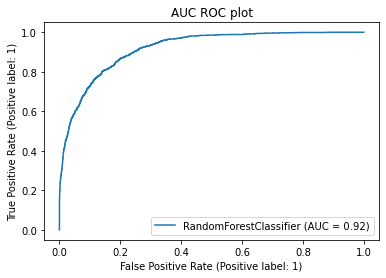

In [28]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gri.best_estimator_,x_test,y_test)
plt.title('AUC ROC plot')
plt.show

Final accuracy is 84% and AUC score is 92% which is decently good.

# Saving the model:

In [29]:
import pickle
filename='census_income.pkl'
pickle.dump(gri.best_estimator_,open(filename,'wb'))


# Conclusion:

In [30]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gri.best_estimator_.predict(x_test))
df_conclusion=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_conclusion

,Original,Predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
6507,0,0
6508,0,0
6509,0,0
6510,0,0
